In [1]:
from parameters import *
from functions import *
from parameters import *
from functions import *
from PDE_solutions import *

walks = 10000
dt =T/200

In [2]:
def StageWalk(X0, R_in, R_f, T_in, dt):
    finalT = T_in
    r = np.sqrt( X0[0]**2 + X0[1]**2 )
    
    while(r > R_f and finalT < T):
        X0 = X0 + u(X0) * dt + sigma * np.sqrt(dt)* norm.rvs(size=2)
        finalT = finalT + dt
        r = np.sqrt( X0[0]**2 + X0[1]**2 )
    
    return X0, finalT

def StageWalk_Plot(X0, R_in, R_f, T_in, dt):
    finalT = T_in
    r = np.sqrt( X0[0]**2 + X0[1]**2 )
    X = [X0]
    while(r > R_f and finalT < T):
        X0 = X0 + u(X0) * dt + sigma * np.sqrt(dt)* norm.rvs(size=2)
        X.append(X0)
        finalT = finalT + dt
        r = np.sqrt( X0[0]**2 + X0[1]**2 )
    
    return np.asarray(X), finalT

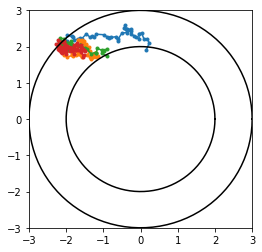

In [3]:
np.random.seed(SEED) #scipy is based on the numpy seed
R_in = 3
R_f = 2
X0 = [-R_in,R_in]/np.sqrt(2)

#plots the walk
plt.figure(figsize=[4,4])

for i in range(4):
    X, finalTime = StageWalk_Plot(X0, R_in, R_f, 0.7, dt)
    X = X.T
    plt.plot(X[0,:],X[1,:], '.-')


plt.xlim([-3,3])
plt.ylim([-3,3])

#plots the well
theta = np.linspace(0,2*np.pi,100)
plt.plot(R_in*np.cos(theta),R_in*np.sin(theta),'k-')
plt.plot(R_f*np.cos(theta),R_f*np.sin(theta),'k-')


In [4]:
def f(X0, T0, H, n, R, stage):
    #recursive function, I don't know how to properly comment this
    
    # H is an array that contains the number of hits, in the reference is what they call R.
    
    count = 0
    
    if stage != n.shape[0]-1:
        while(count < n[stage]):
            X, finalT = StageWalk(X0, R[stage], R[stage+1], T0, dt)
            if(finalT < T):
                H[stage] = H[stage] + 1
                H = f(X, finalT, H, n, R, stage + 1)
            count = count + 1
    else:
        while(count < n[stage]):
            X, finalT = StageWalk(X0, R[stage], R[stage+1], T0, dt)
            if(finalT < T):
                H[stage] = H[stage] + 1
                #don't call the function again, we are in the final layer
            count = count + 1
    return H


390625.0


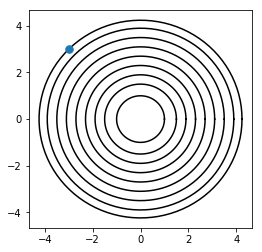

In [31]:
X0 = [-3, 3]
R_initial = np.sqrt( X0[0]**2 + X0[1]**2 )
R = np.array([R_initial,3.9,3.5,3.1,2.7,2.3,1.9,1.5,1])
n = np.ones(R.shape[0]-1) * 5
H = np.zeros(R.shape[0]-1) #hits

plt.figure(figsize=[4,4])
for radius in R:
    theta = np.linspace(0,2*np.pi,100)
    plt.plot(radius*np.cos(theta),radius*np.sin(theta),'k-')

plt.plot(X0[0],X0[1],'.', ms = 15)
print(n.prod())

In [32]:
H = f(X0, 0, H, n, R, 0)

In [33]:
#compute the probability
NUM = H[-1]
DEN = n.prod()
NUM/DEN

0.01609728